<a href="https://colab.research.google.com/github/TranDangKhoi-20146356/AI/blob/main/MONEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training=train_data.flow_from_directory('/content/drive/MyDrive/trí tuệ nhân tạo/AI/money/money train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 220 images belonging to 11 classes.


In [ ]:

training.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(11,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
train=model.fit(training,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
7/7 [==============================] - 3s 397ms/step - loss: 0.1637 - accuracy: 0.9545
Epoch 2/20
7/7 [==============================] - 3s 403ms/step - loss: 0.1341 - accuracy: 0.9591
Epoch 3/20
7/7 [==============================] - 4s 549ms/step - loss: 0.1492 - accuracy: 0.9500
Epoch 4/20
7/7 [==============================] - 3s 400ms/step - loss: 0.1156 - accuracy: 0.9591
Epoch 5/20
7/7 [==============================] - 3s 425ms/step - loss: 0.0789 - accuracy: 0.9682
Epoch 6/20
7/7 [==============================] - 3s 397ms/step - loss: 0.1404 - accuracy: 0.9545
Epoch 7/20
7/7 [==============================] - 4s 596ms/step - loss: 0.0344 - accuracy: 0.9864
Epoch 8/20
7/7 [==============================] - 3s 417ms/step - loss: 0.0598 - accuracy: 0.9773
Epoch 9/20
7/7 [==============================] - 3s 401ms/step - loss: 0.0273 - accuracy: 1.0000
Epoch 10/20
7/7 [==============================] - 4s 513ms/step - loss: 0.0174 - accuracy: 0.9955
Epoch 11/20
7/7 [==

In [ ]:

# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])
     

Train Loss 0.011981741525232792
Train Accuracy 0.9909090995788574


In [ ]:
# Lưu 
model.save("/content/drive/MyDrive/trí tuệ nhân tạo/AI/money.h5")

In [ ]:
model_1=load_model('/content/drive/MyDrive/trí tuệ nhân tạo/AI/money.h5')

1/1 [==============================] - 0s 78ms/step
2k


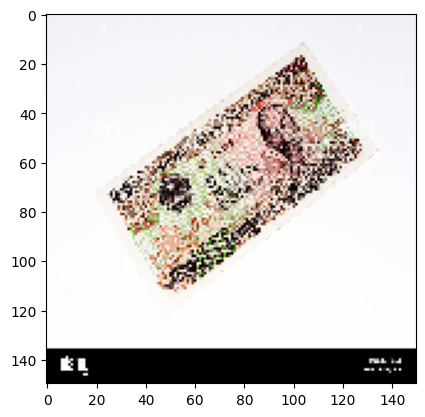

1/1 [==============================] - 0s 19ms/step
10K


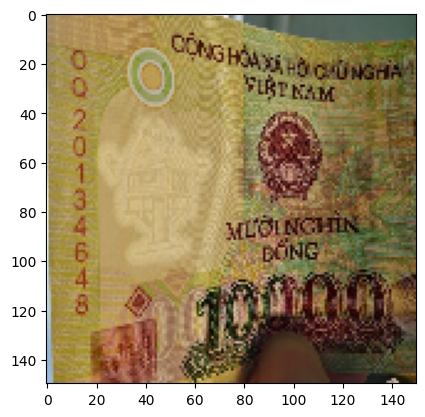

1/1 [==============================] - 0s 18ms/step
10K


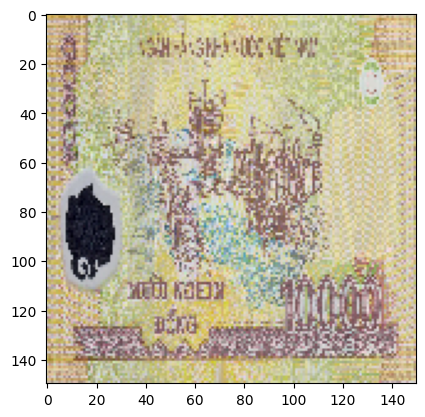

1/1 [==============================] - 0s 18ms/step
2k


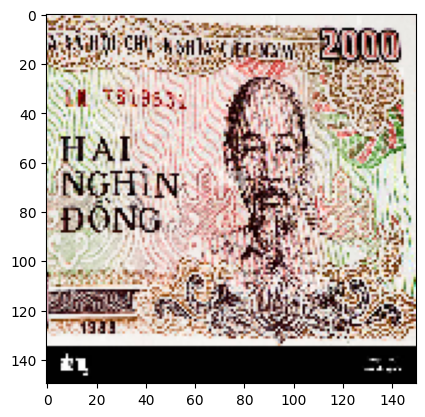

1/1 [==============================] - 0s 35ms/step
500K


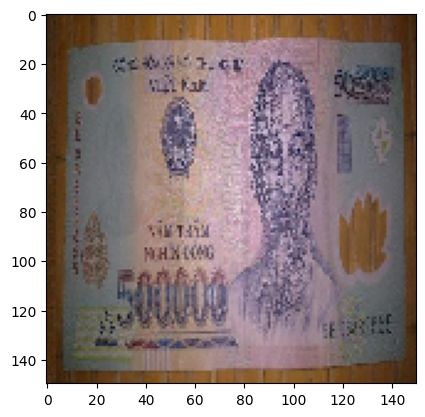

1/1 [==============================] - 0s 22ms/step
50K


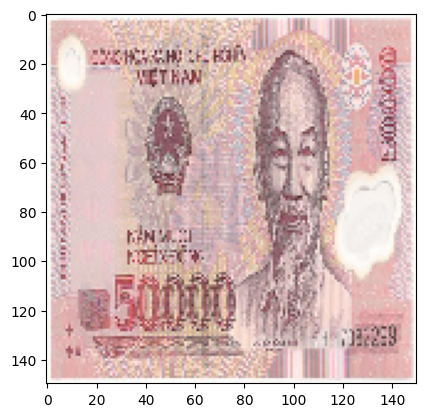

In [ ]:
folder="/content/drive/MyDrive/trí tuệ nhân tạo/AI/money/money test/"

for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['1K','10K','100K','200','2k','20K','200K','500','5k','50K','500K']
  print(class_name[result])
  plt.show()